# 가중치 초깃값, 배치 정규화 등

- 은닉층의 활성화값(활성화 함수의 출력 데이터)의 분포를 관찰하면 중요한 정보를 얻을 수 있다.
  - 가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는지 알아보자
  - 활성화 함수로 시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 입력 데이터를 흘리며 각 층의 활성화값 분포를 히스토그램으로 그려보자

C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


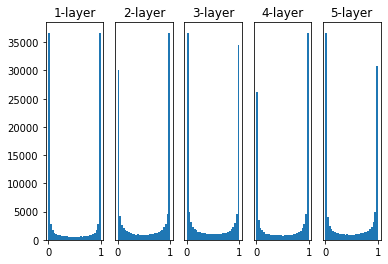

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있다.
- 여기에서 사용한 시그모이드 함수는 그 출력이 0에 가까워지자 또는 1에 가까워지자 그 미분은 0에 다가간다. 그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라진다.
- 이것이 `기울기 소실`이다. 
- 이번에는 가중치의 표준편차를 0.01로 바꿔 같은 실험을 반복해보자

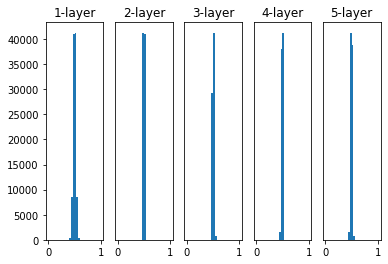

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 이번에는 0.5 부근에 집중되어 있다. 앞의 그래프처럼 0과 1에 치우치진 않았으니 기울기 소실 문제는 일어나지 않지만 활성화값들이 치우쳤다는 것은 표현력 관점에서는 큰 문제가 있는 것이다.
- 즉, 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러 개 둔 의미가 없어진다는 뜻이다. 
- 예를 들어, 뉴런 100개가 거의 같은 값을 출력한다면 뉴런 1개짜리와 별반 다를 게 없는 것이다. 
- 그래서 활성화값들이 치우치면 표현력을 제한한다는 관점에서 문제가 된다. 
- 각 층의 활성화값은 적당히 고루 분포되어야 한다. 층과 층 사이에 적당하게 다양한 데이터가 흐르게 해야 신경망 학습이 효율적으로 이루어지기 때문이다. 치우친 데이터가 흐르면 기울기 소실이나 표현력 제한 문제에 빠져 학습이 잘 이루어지지 않을 수 있다. 

- 권장되는 Xavier 초깃값을 써보자
  - 이 초깃값을 사용하면 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다. 

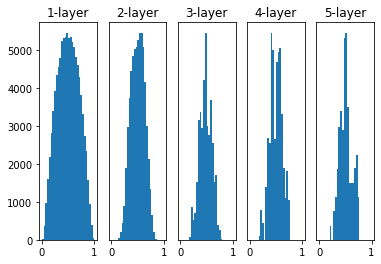

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 층이 깊어지면서 형태가 다소 일그러지지만, 앞에서 본 방식보다는 확연히 넓게 분포되는 것을 알 수 있다. 
- 각 층에 흐르는 데이터는 적당히 퍼져 있으므로 시그모이드 함수의 표현력도 제한받지 않고, 학습이 효율적으로 이뤄질 것으로 기대할 수 있다. 

- Xavier 초깃값을 활성화 함수가 선형인 것을 전제로 이끈 결과이다. 시그모이드 함수와 tanh 함수는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있다. 그래서 Xavier 초깃값이 적당하다. 
- 반면 ReLU를 이용할 때는 ReLU에 특화된 초깃값을 이용하라고 권장한다. 
- 해당 초깃값을 He 초깃값이라 한다.

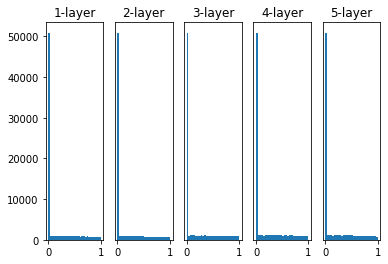

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def relu(x):
    return np.maximum(0,x)

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * np.sqrt(2) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = relu(a)
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- He 초깃값은 모든 층에서 균일하게 분포되어 있다.
- 층이 깊어져도 분포가 균일하게 유지되기에 역전파 때도 적절한 값이 나올 것으로 기대할 수 있다. 
- 따라서 활성화 함수로 ReLU를 사용할 때는 He 초깃값을, sigmoid마 tanh 등의 S자 모양 곡선일 때는 Xavier 초깃값을 쓴다. 

---

- MNIST 데이터셋으로 본 가중치 초깃값 비교
  - 실제 데이터를 가지고 가중치의 초깃값을 주는 방법이 신경망 학습에 얼마나 영향을 주는지 알아보자

===========iteration:0===========
std=0.01:2.302429797639348
Xavier:2.3026148669107496
He:2.277857804579289
===========iteration:100===========
std=0.01:2.303292853997276
Xavier:2.234326172265587
He:1.5005924485044848
===========iteration:200===========
std=0.01:2.301417343514494
Xavier:2.087924436660839
He:0.7067580473137639
===========iteration:300===========
std=0.01:2.3013438187421946
Xavier:1.770500143384992
He:0.5602112129657093
===========iteration:400===========
std=0.01:2.3014368742428744
Xavier:1.3176740433596514
He:0.3681439703994114
===========iteration:500===========
std=0.01:2.3044005756657437
Xavier:0.9902237159385396
He:0.30892714112828057
===========iteration:600===========
std=0.01:2.3030591310458215
Xavier:0.7526462154317728
He:0.40218584589549555
===========iteration:700===========
std=0.01:2.3041291713479843
Xavier:0.586208347563391
He:0.3337892925219035
===========iteration:800===========
std=0.01:2.303364952400675
Xavier:0.63464499915734
He:0.41187381352936203
==

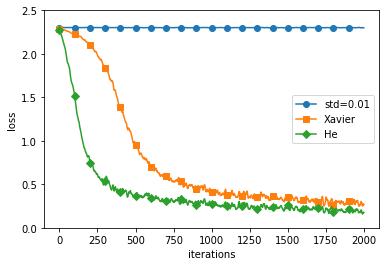

In [5]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

- std = 0.01일 때는 학습이 전혀 이루어지지 않고 있다.
  - 순전파 때 너무 작은 값(0 근처로 밀집한 데이터)이 흐르기 때문이다. 그로 인해 역전파 때의 기울기도 작아져 가중치가 거의 갱신되지 않는 것이다. 
- He 초깃값이나 Xavier의 경우 학습이 순조롭게 이뤄지고 있음을 알 수 있다. 
  - 다만 학습 진도는 He 초깃값 쪽이 더 빠르다.
  

---

- 배치 정규화
  - 각 층이 활성화를 적당히 퍼뜨리도록 강제해보자
    - 1) 학습을 빨리 진행할 수 있다.
    - 2) 초깃값에 크게 의존하지 않는다.
    - 3) 오버피팅을 억제한다.
  - 데이터 분포를 정규화하는 배치 정규화 계층을 신경망에 삽입한다.

- 미니배치 B라는 m개의 입력 데이터의 집합에 대해 평군과 분산을 구한다.
- 그리고 입력 데이터를 평균이 0 분산이 1이 되게 정규화한다. 
- 미니배치 입력 데이터를 평균 0, 분산 1인 데이터로 변환해주는 처리를 활성화 함수의 앞 혹은 뒤에 삽입함으로써 데이터 분포가 덜 치우치게 할 수 있다. 
- 또, 배치 정규화 계층마다 이 정규화된 데이터 대한 고유한 확대와 이동 변환을 수행한다. (수식은 교재 212p를  참고한다. )

- 해당 배치 정규화의 알고리즘이 신경망에서 순전파 때 적용된다. 

- MNIST 데이터 셋을 사용하여 배치 정규화 계층을 사용할 때와 사용하지 않을 때의 학습 진도가 어떻게 달라지는지 살펴보자

============== 1/16 ==============
epoch:0 | 0.099 - 0.112
epoch:1 | 0.097 - 0.129


C:\Users\ehfus\Downloads\DeepLearning\deep-learning-from-scratch-master\ch06\..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\ehfus\Downloads\DeepLearning\deep-learning-from-scratch-master\ch06\..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\ehfus\Downloads\DeepLearning\deep-learning-from-scratch-master\ch06\..\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:2 | 0.097 - 0.166
epoch:3 | 0.097 - 0.178
epoch:4 | 0.097 - 0.181
epoch:5 | 0.097 - 0.195
epoch:6 | 0.097 - 0.218
epoch:7 | 0.097 - 0.238
epoch:8 | 0.097 - 0.245
epoch:9 | 0.097 - 0.251
epoch:10 | 0.097 - 0.285
epoch:11 | 0.097 - 0.3
epoch:12 | 0.097 - 0.316
epoch:13 | 0.097 - 0.331
epoch:14 | 0.097 - 0.339
epoch:15 | 0.097 - 0.351
epoch:16 | 0.097 - 0.366
epoch:17 | 0.097 - 0.382
epoch:18 | 0.097 - 0.393


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.401
============== 2/16 ==============
epoch:0 | 0.097 - 0.092
epoch:1 | 0.097 - 0.102


C:\Users\ehfus\Downloads\DeepLearning\deep-learning-from-scratch-master\ch06\..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\ehfus\Downloads\DeepLearning\deep-learning-from-scratch-master\ch06\..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.097 - 0.125
epoch:3 | 0.097 - 0.16
epoch:4 | 0.097 - 0.197
epoch:5 | 0.097 - 0.222
epoch:6 | 0.097 - 0.236
epoch:7 | 0.097 - 0.267
epoch:8 | 0.097 - 0.284
epoch:9 | 0.097 - 0.316
epoch:10 | 0.097 - 0.343
epoch:11 | 0.097 - 0.357
epoch:12 | 0.097 - 0.372
epoch:13 | 0.097 - 0.387
epoch:14 | 0.097 - 0.401
epoch:15 | 0.097 - 0.423
epoch:16 | 0.097 - 0.442
epoch:17 | 0.097 - 0.46


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.465
epoch:19 | 0.097 - 0.479
============== 3/16 ==============
epoch:0 | 0.098 - 0.092
epoch:1 | 0.361 - 0.13
epoch:2 | 0.488 - 0.165
epoch:3 | 0.605 - 0.183
epoch:4 | 0.674 - 0.207
epoch:5 | 0.717 - 0.254
epoch:6 | 0.78 - 0.297
epoch:7 | 0.813 - 0.324
epoch:8 | 0.831 - 0.371
epoch:9 | 0.867 - 0.4
epoch:10 | 0.905 - 0.439
epoch:11 | 0.903 - 0.466
epoch:12 | 0.919 - 0.498
epoch:13 | 0.935 - 0.529
epoch:14 | 0.941 - 0.551
epoch:15 | 0.949 - 0.566
epoch:16 | 0.958 - 0.585
epoch:17 | 0.967 - 0.613
epoch:18 | 0.967 - 0.626
epoch:19 | 0.971 - 0.643


No handles with labels found to put in legend.


============== 4/16 ==============
epoch:0 | 0.099 - 0.099
epoch:1 | 0.207 - 0.093
epoch:2 | 0.367 - 0.183
epoch:3 | 0.484 - 0.242
epoch:4 | 0.569 - 0.285
epoch:5 | 0.623 - 0.336
epoch:6 | 0.661 - 0.389
epoch:7 | 0.689 - 0.44
epoch:8 | 0.726 - 0.493
epoch:9 | 0.743 - 0.538
epoch:10 | 0.763 - 0.569
epoch:11 | 0.771 - 0.613
epoch:12 | 0.782 - 0.638
epoch:13 | 0.797 - 0.672
epoch:14 | 0.818 - 0.689
epoch:15 | 0.839 - 0.711
epoch:16 | 0.841 - 0.73
epoch:17 | 0.857 - 0.746
epoch:18 | 0.869 - 0.766
epoch:19 | 0.866 - 0.781


No handles with labels found to put in legend.


============== 5/16 ==============
epoch:0 | 0.091 - 0.101
epoch:1 | 0.101 - 0.167
epoch:2 | 0.111 - 0.277
epoch:3 | 0.121 - 0.395
epoch:4 | 0.122 - 0.532
epoch:5 | 0.136 - 0.597
epoch:6 | 0.155 - 0.642
epoch:7 | 0.177 - 0.688
epoch:8 | 0.185 - 0.726
epoch:9 | 0.195 - 0.746
epoch:10 | 0.219 - 0.772
epoch:11 | 0.231 - 0.789
epoch:12 | 0.242 - 0.8
epoch:13 | 0.232 - 0.813
epoch:14 | 0.248 - 0.822
epoch:15 | 0.24 - 0.837
epoch:16 | 0.254 - 0.844
epoch:17 | 0.253 - 0.851
epoch:18 | 0.265 - 0.863
epoch:19 | 0.263 - 0.873


No handles with labels found to put in legend.


============== 6/16 ==============
epoch:0 | 0.114 - 0.123
epoch:1 | 0.117 - 0.169
epoch:2 | 0.117 - 0.356
epoch:3 | 0.117 - 0.52
epoch:4 | 0.117 - 0.633
epoch:5 | 0.16 - 0.692
epoch:6 | 0.14 - 0.74
epoch:7 | 0.117 - 0.771
epoch:8 | 0.117 - 0.785
epoch:9 | 0.117 - 0.816
epoch:10 | 0.117 - 0.829
epoch:11 | 0.117 - 0.843
epoch:12 | 0.117 - 0.854
epoch:13 | 0.117 - 0.873
epoch:14 | 0.117 - 0.885
epoch:15 | 0.117 - 0.9
epoch:16 | 0.117 - 0.911
epoch:17 | 0.137 - 0.921


No handles with labels found to put in legend.


epoch:18 | 0.204 - 0.927
epoch:19 | 0.144 - 0.932
============== 7/16 ==============
epoch:0 | 0.117 - 0.094
epoch:1 | 0.117 - 0.31
epoch:2 | 0.117 - 0.617
epoch:3 | 0.117 - 0.744
epoch:4 | 0.117 - 0.802
epoch:5 | 0.116 - 0.843
epoch:6 | 0.117 - 0.862
epoch:7 | 0.117 - 0.893
epoch:8 | 0.117 - 0.912
epoch:9 | 0.117 - 0.926
epoch:10 | 0.117 - 0.942
epoch:11 | 0.117 - 0.952
epoch:12 | 0.117 - 0.957
epoch:13 | 0.117 - 0.962
epoch:14 | 0.117 - 0.968
epoch:15 | 0.117 - 0.975
epoch:16 | 0.117 - 0.981
epoch:17 | 0.117 - 0.986
epoch:18 | 0.117 - 0.988


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.989
============== 8/16 ==============
epoch:0 | 0.092 - 0.094
epoch:1 | 0.099 - 0.441
epoch:2 | 0.105 - 0.622
epoch:3 | 0.117 - 0.737
epoch:4 | 0.117 - 0.788
epoch:5 | 0.117 - 0.838
epoch:6 | 0.117 - 0.869
epoch:7 | 0.117 - 0.899
epoch:8 | 0.116 - 0.937
epoch:9 | 0.116 - 0.961
epoch:10 | 0.117 - 0.971
epoch:11 | 0.117 - 0.982
epoch:12 | 0.117 - 0.988
epoch:13 | 0.117 - 0.991
epoch:14 | 0.117 - 0.994
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 9/16 ==============
epoch:0 | 0.093 - 0.104
epoch:1 | 0.117 - 0.563
epoch:2 | 0.117 - 0.701
epoch:3 | 0.117 - 0.788
epoch:4 | 0.117 - 0.891
epoch:5 | 0.116 - 0.931
epoch:6 | 0.117 - 0.955
epoch:7 | 0.117 - 0.974
epoch:8 | 0.117 - 0.988
epoch:9 | 0.117 - 0.991
epoch:10 | 0.117 - 0.993
epoch:11 | 0.117 - 0.993
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.116 - 0.097
epoch:1 | 0.117 - 0.406
epoch:2 | 0.117 - 0.622
epoch:3 | 0.117 - 0.691
epoch:4 | 0.117 - 0.845
epoch:5 | 0.117 - 0.904
epoch:6 | 0.116 - 0.96
epoch:7 | 0.117 - 0.964
epoch:8 | 0.116 - 0.977
epoch:9 | 0.117 - 0.984
epoch:10 | 0.117 - 0.976
epoch:11 | 0.117 - 0.995
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.999
============== 11/16 ==============
epoch:0 | 0.116 - 0.099
epoch:1 | 0.117 - 0.465
epoch:2 | 0.117 - 0.626
epoch:3 | 0.117 - 0.733
epoch:4 | 0.117 - 0.736
epoch:5 | 0.117 - 0.772
epoch:6 | 0.117 - 0.758
epoch:7 | 0.117 - 0.785
epoch:8 | 0.117 - 0.801
epoch:9 | 0.117 - 0.796
epoch:10 | 0.117 - 0.798
epoch:11 | 0.117 - 0.801
epoch:12 | 0.117 - 0.811
epoch:13 | 0.117 - 0.806
epoch:14 | 0.117 - 0.898
epoch:15 | 0.117 - 0.896
epoch:16 | 0.117 - 0.902
epoch:17 | 0.117 - 0.901
epoch:18 | 0.117 - 0.898


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.974
============== 12/16 ==============
epoch:0 | 0.117 - 0.17
epoch:1 | 0.105 - 0.424
epoch:2 | 0.116 - 0.375
epoch:3 | 0.117 - 0.701
epoch:4 | 0.117 - 0.765
epoch:5 | 0.117 - 0.829
epoch:6 | 0.117 - 0.84
epoch:7 | 0.117 - 0.853
epoch:8 | 0.117 - 0.82
epoch:9 | 0.117 - 0.863
epoch:10 | 0.117 - 0.883
epoch:11 | 0.117 - 0.876
epoch:12 | 0.117 - 0.88
epoch:13 | 0.117 - 0.864
epoch:14 | 0.117 - 0.877
epoch:15 | 0.117 - 0.811
epoch:16 | 0.117 - 0.843
epoch:17 | 0.117 - 0.873
epoch:18 | 0.117 - 0.886
epoch:19 | 0.117 - 0.834


No handles with labels found to put in legend.


============== 13/16 ==============
epoch:0 | 0.097 - 0.252
epoch:1 | 0.097 - 0.455
epoch:2 | 0.117 - 0.415
epoch:3 | 0.117 - 0.588
epoch:4 | 0.117 - 0.593
epoch:5 | 0.117 - 0.603
epoch:6 | 0.117 - 0.606
epoch:7 | 0.117 - 0.603
epoch:8 | 0.116 - 0.624
epoch:9 | 0.116 - 0.657
epoch:10 | 0.116 - 0.636
epoch:11 | 0.116 - 0.647
epoch:12 | 0.116 - 0.638
epoch:13 | 0.116 - 0.631
epoch:14 | 0.116 - 0.68
epoch:15 | 0.116 - 0.701
epoch:16 | 0.116 - 0.72
epoch:17 | 0.116 - 0.743
epoch:18 | 0.116 - 0.762


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.802
============== 14/16 ==============
epoch:0 | 0.097 - 0.1
epoch:1 | 0.117 - 0.337
epoch:2 | 0.117 - 0.445
epoch:3 | 0.117 - 0.46
epoch:4 | 0.117 - 0.498
epoch:5 | 0.117 - 0.504
epoch:6 | 0.117 - 0.52
epoch:7 | 0.117 - 0.511
epoch:8 | 0.117 - 0.518
epoch:9 | 0.117 - 0.521
epoch:10 | 0.117 - 0.558
epoch:11 | 0.117 - 0.602
epoch:12 | 0.117 - 0.598
epoch:13 | 0.117 - 0.568
epoch:14 | 0.117 - 0.594
epoch:15 | 0.117 - 0.592
epoch:16 | 0.117 - 0.593
epoch:17 | 0.117 - 0.616
epoch:18 | 0.117 - 0.612
epoch:19 | 0.117 - 0.623


No handles with labels found to put in legend.


============== 15/16 ==============
epoch:0 | 0.117 - 0.147
epoch:1 | 0.105 - 0.346
epoch:2 | 0.105 - 0.389
epoch:3 | 0.105 - 0.419
epoch:4 | 0.105 - 0.412
epoch:5 | 0.116 - 0.431
epoch:6 | 0.116 - 0.438
epoch:7 | 0.116 - 0.48
epoch:8 | 0.116 - 0.469
epoch:9 | 0.116 - 0.589
epoch:10 | 0.116 - 0.593
epoch:11 | 0.116 - 0.658
epoch:12 | 0.116 - 0.604
epoch:13 | 0.116 - 0.658
epoch:14 | 0.116 - 0.664
epoch:15 | 0.116 - 0.566
epoch:16 | 0.116 - 0.685
epoch:17 | 0.116 - 0.705


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.633
epoch:19 | 0.116 - 0.712
============== 16/16 ==============
epoch:0 | 0.117 - 0.171
epoch:1 | 0.117 - 0.218
epoch:2 | 0.117 - 0.313
epoch:3 | 0.117 - 0.309
epoch:4 | 0.117 - 0.305
epoch:5 | 0.117 - 0.336
epoch:6 | 0.117 - 0.409
epoch:7 | 0.117 - 0.423
epoch:8 | 0.117 - 0.415
epoch:9 | 0.117 - 0.419
epoch:10 | 0.117 - 0.422
epoch:11 | 0.117 - 0.42
epoch:12 | 0.117 - 0.421
epoch:13 | 0.117 - 0.419
epoch:14 | 0.117 - 0.407
epoch:15 | 0.117 - 0.431
epoch:16 | 0.117 - 0.438
epoch:17 | 0.117 - 0.446
epoch:18 | 0.117 - 0.437
epoch:19 | 0.117 - 0.367


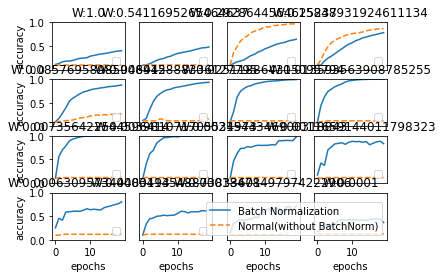

In [6]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()

- 거의 모든 경우에서 배치 정규화를 사용할 때의 학습 진도가 빠른 것을 볼 수 있다.
- 배치 정규화를 이용하지 않는 경우엔 초깃값이 잘 분포되어 있지 않으면 학습이 전혀 진행되지 않는 모습도 확인할 수 있다. 

----

- 기계학습에서는 오버피팅이 문제가 되는 경우가 많다. 
   - 오버피팅이란 신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태를 말한다. 범용 성능을 갖지 못하는 것이다. 
   - 오버피팅의 경우 1) : 매개변수가 많고 표현력이 높은 모델
   - 오버피팅의 경우 2) : 훈련 데이터가 적을 때

---

- 오버피팅 억제
  - 가중치 감소 : 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 오버피팅을 억제하는 방법이다. 원래 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문이다.